In [2]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [3]:
import pandas as pd 
data=pd.read_csv('C:\\Users\\Hp\\Desktop\\projet dev\\AEP_hourly1.csv',index_col=[0], parse_dates=[0])
df=data.copy()

In [4]:
df.head()

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


<Axes: title={'center': 'energy consamption'}, xlabel='Datetime'>

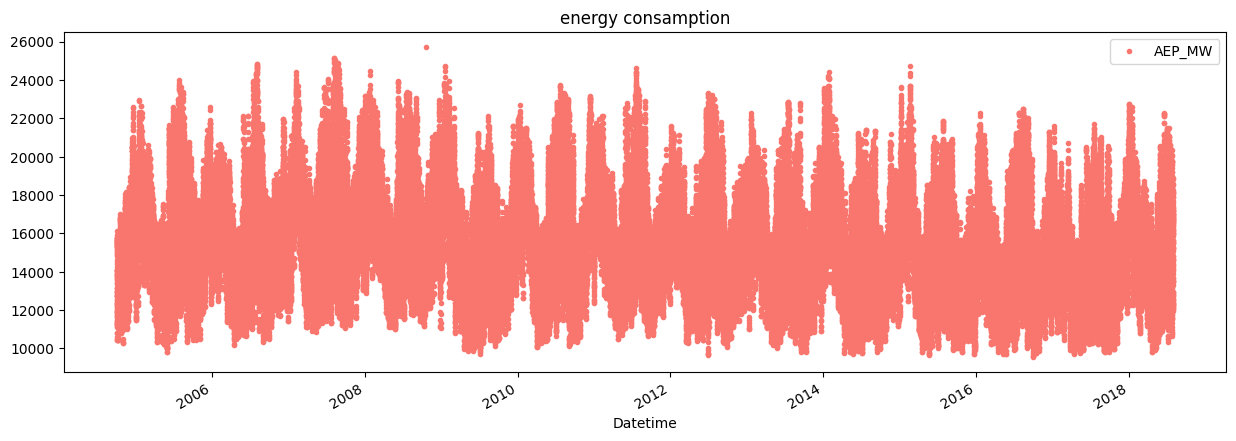

In [5]:

df.plot(style='.', figsize=(15,5), color="#F8766D", title='energy consamption')

In [6]:
split_date = '01-Jan-2015'
df_train = df.loc[df.index <= split_date]
df_test = df.loc[df.index > split_date]

<Axes: title={'center': 'energy consamption'}, xlabel='Datetime'>

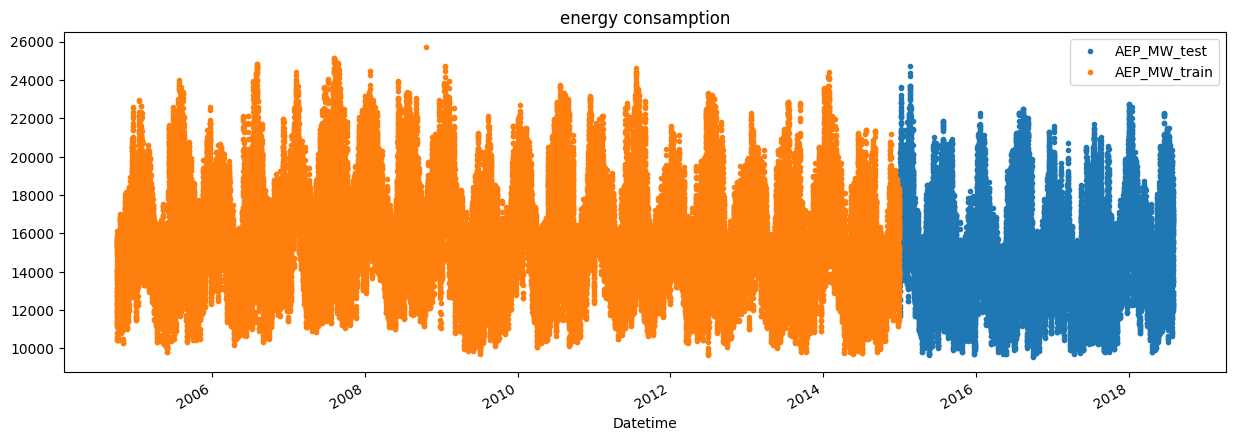

In [7]:

df_test = df_test.rename(columns={'PJME_MW': 'TEST SET'})
df_train = df_train.rename(columns={'PJME_MW': 'TRAINING SET'})

df_combined = df_test.join(df_train, how='outer', lsuffix='_test', rsuffix='_train')


df_combined.plot(figsize=(15,5), title='energy consamption', style='.')


In [8]:
def create_features(df, label=None):
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    
    
    X = df[['hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth']]
    if label:
        y = df[label]
        return X, y
    return X

In [9]:
X_train, y_train = create_features(df_train, label='AEP_MW')
X_test, y_test = create_features(df_test, label='AEP_MW')

In [10]:
X_test

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
Datetime,,,,,,,
2015-12-31 01:00:00,1,3,4,12,2015,365,31
2015-12-31 02:00:00,2,3,4,12,2015,365,31
2015-12-31 03:00:00,3,3,4,12,2015,365,31
2015-12-31 04:00:00,4,3,4,12,2015,365,31
2015-12-31 05:00:00,5,3,4,12,2015,365,31
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,20,0,1,1,2018,1,1
2018-01-01 21:00:00,21,0,1,1,2018,1,1
2018-01-01 22:00:00,22,0,1,1,2018,1,1


In [11]:
reg = xgb.XGBRegressor(n_estimators=1000)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
       verbose=False)

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

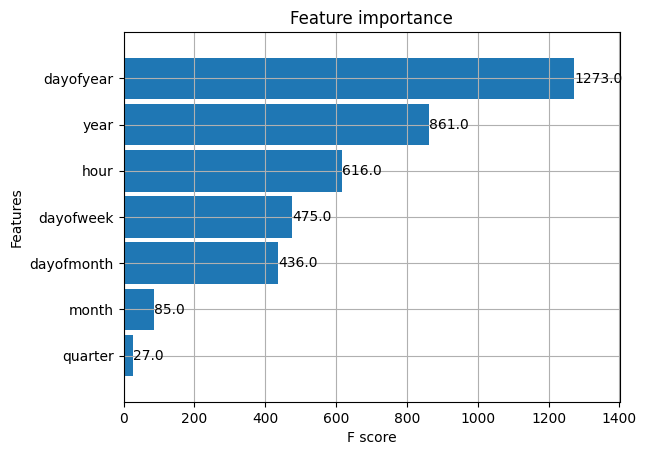

In [12]:
plot_importance(reg, height=0.9)

In [13]:
X_test

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth
Datetime,,,,,,,
2015-12-31 01:00:00,1,3,4,12,2015,365,31
2015-12-31 02:00:00,2,3,4,12,2015,365,31
2015-12-31 03:00:00,3,3,4,12,2015,365,31
2015-12-31 04:00:00,4,3,4,12,2015,365,31
2015-12-31 05:00:00,5,3,4,12,2015,365,31
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,20,0,1,1,2018,1,1
2018-01-01 21:00:00,21,0,1,1,2018,1,1
2018-01-01 22:00:00,22,0,1,1,2018,1,1


In [14]:
e=reg.predict([[1,2,3,5,2015,5,5]])
e

array([16661.012], dtype=float32)

In [15]:
df_test['MW_Prediction'] = reg.predict(X_test)
df_all = pd.concat([df_test, df_train], sort=False)

<Axes: xlabel='Datetime'>

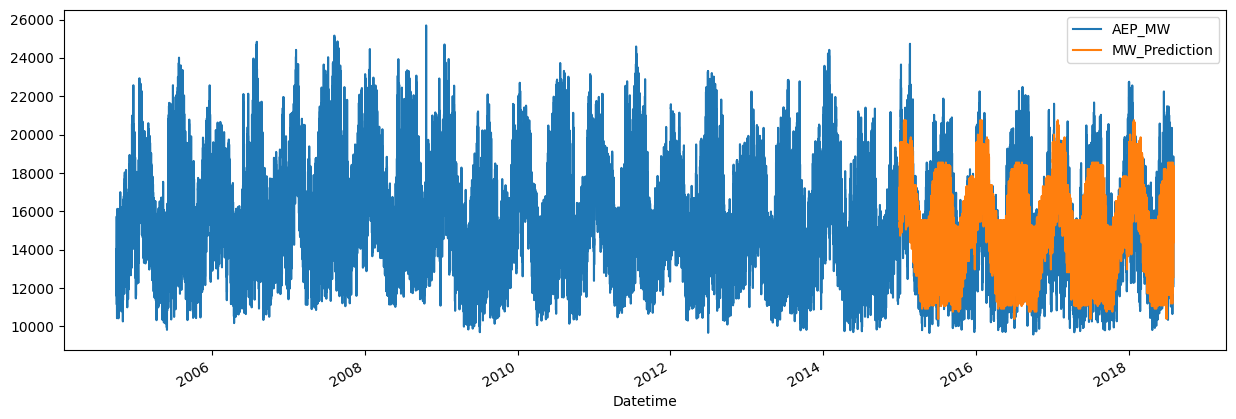

In [16]:

df_all[['AEP_MW','MW_Prediction']].plot(figsize=(15, 5))

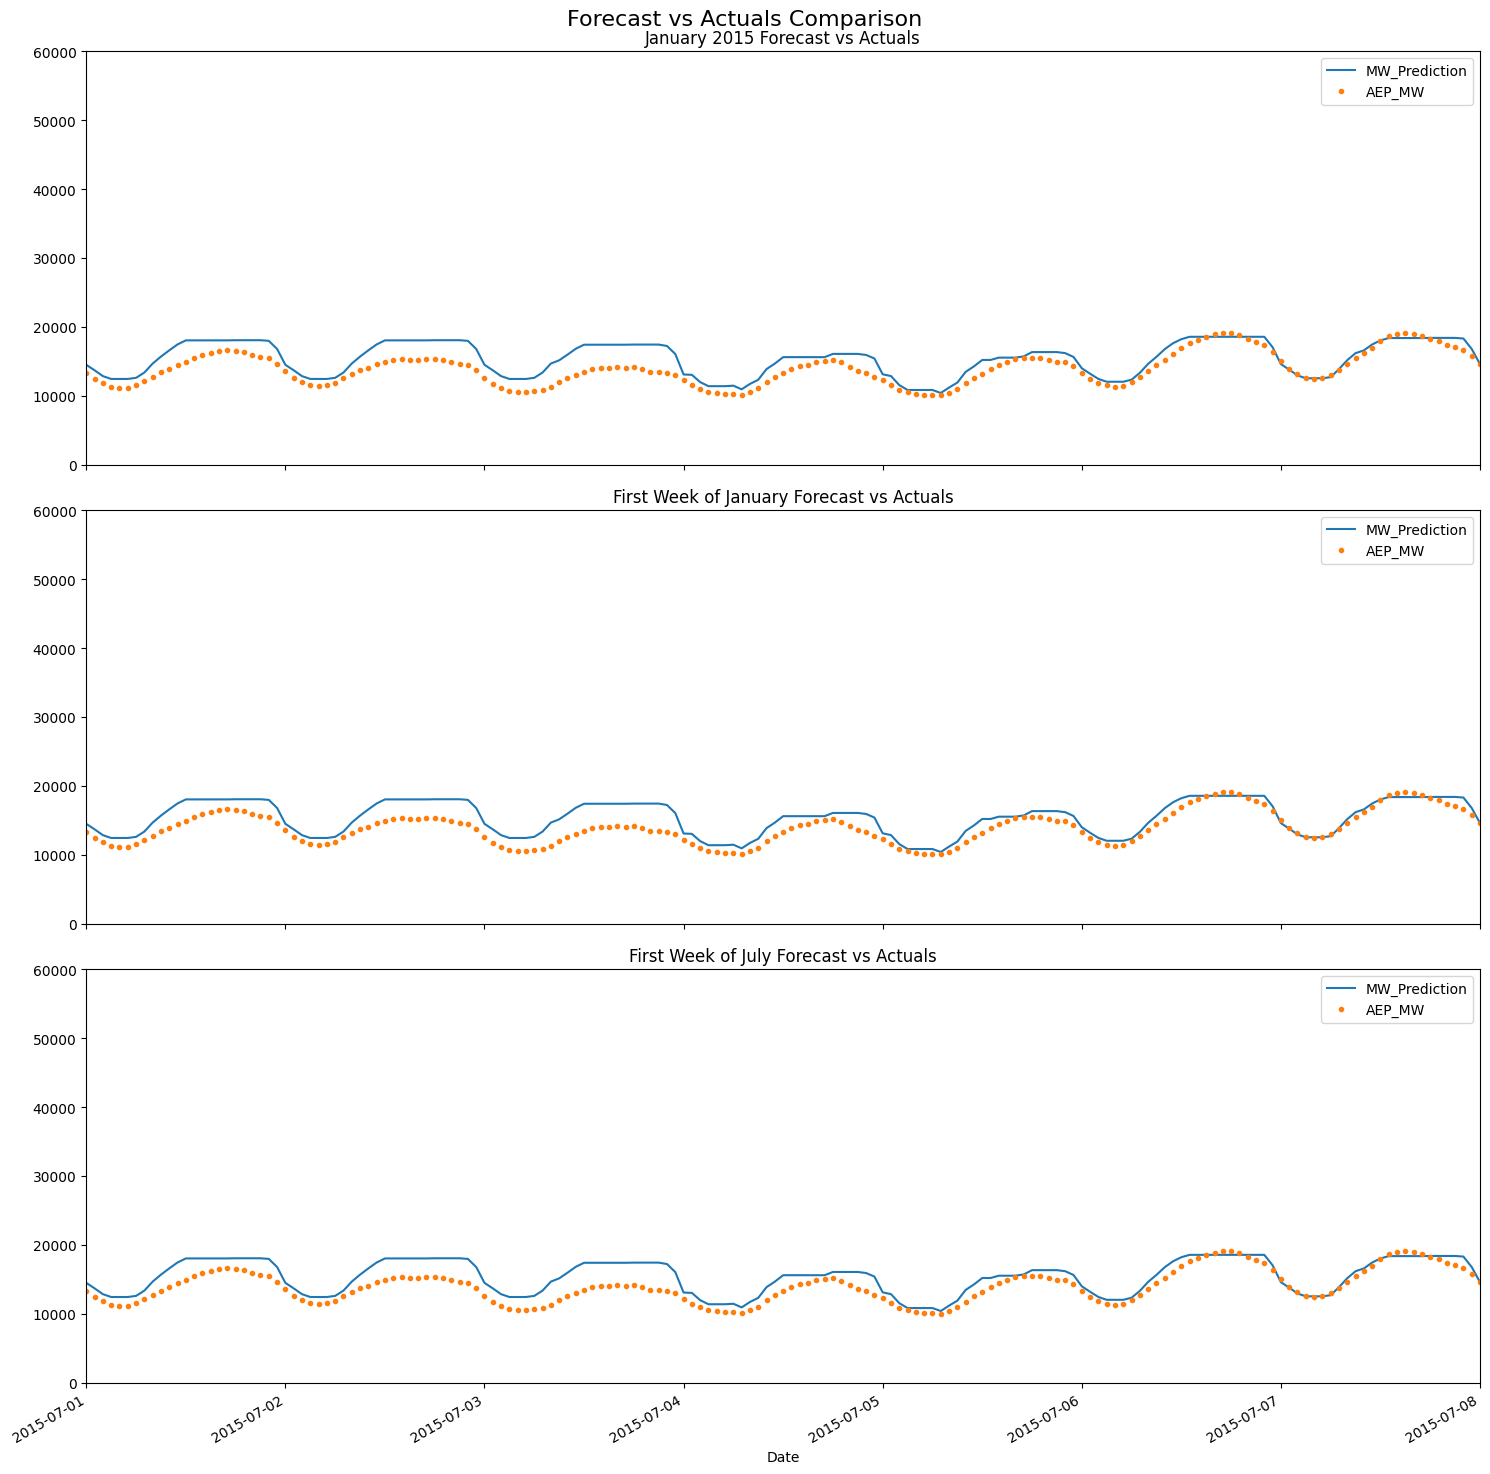

In [17]:


fig, axes = plt.subplots(3, 1, figsize=(15, 15), sharex=True) 
fig.suptitle("Forecast vs Actuals Comparison", fontsize=16)


df_all[["MW_Prediction", "AEP_MW"]].plot(ax=axes[0], style=["-", "."])
axes[0].set_xbound(lower='01-01-2015', upper='02-01-2015')
axes[0].set_ylim(0, 60000)
axes[0].set_title("January 2015 Forecast vs Actuals")


df_all[["MW_Prediction", "AEP_MW"]].plot(ax=axes[1], style=["-", "."])
axes[1].set_xbound(lower='01-01-2015', upper='01-08-2015')
axes[1].set_ylim(0, 60000)
axes[1].set_title("First Week of January Forecast vs Actuals")


df_all[["MW_Prediction", "AEP_MW"]].plot(ax=axes[2], style=["-", "."])
axes[2].set_xbound(lower='07-01-2015', upper='07-08-2015')
axes[2].set_ylim(0, 60000)
axes[2].set_title("First Week of July Forecast vs Actuals")
axes[2].set_xlabel("Date")  


plt.tight_layout()

plt.show()

In [18]:

mean_squared_error(y_true=df_test['AEP_MW'],y_pred=df_test['MW_Prediction'])

2953893.302826179

In [19]:
mean_absolute_error(y_true=df_test['AEP_MW'],y_pred=df_test['MW_Prediction'])

1365.3497249572088

In [20]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [21]:
mean_absolute_percentage_error(y_true=df_test['AEP_MW'],y_pred=df_test['MW_Prediction'])

9.373152324932883

In [22]:
df_test['error'] = df_test['AEP_MW'] - df_test['MW_Prediction']
df_test['abs_error'] = df_test['error'].apply(np.abs)
error_by_day = df_test.groupby(['year','month','dayofmonth']) \
    .mean()[['AEP_MW','MW_Prediction','error','abs_error']]

In [23]:
error_by_day

AEP_MW  MW_Prediction        error    abs_error
year month dayofmonth                                                       
2015 1     1           15968.304348   16399.197266  -430.892960   889.058127
           2           15515.791667   17586.746094 -2070.954549  2070.954549
           3           14698.250000   16548.478516 -1850.227946  1850.227946
           4           13634.875000   15766.252930 -2131.377970  2131.377970
           5           17810.083333   17863.302734   -53.220378   640.850586
...                             ...            ...          ...          ...
2018 7     30          15368.083333   16181.914062  -813.830851   814.123901
           31          15180.291667   16171.235352  -990.943888  1031.757121
     8     1           15151.166667   16171.235352 -1020.068888  1038.372192
           2           15687.666667   16171.235352  -483.568888   599.629272
           3           14809.000000   14386.928711   422.071289   422.071289

[1311 rows x 4 columns]

In [24]:
error_by_day.sort_values('error', ascending=True).head(10)

AEP_MW  MW_Prediction        error    abs_error
year month dayofmonth                                                       
2017 1     23          14428.125000   19393.681641 -4965.556722  4965.556722
2018 1     22          14509.750000   19393.681641 -4883.931722  4883.931722
2017 1     25          14862.458333   19618.314453 -4755.854899  4755.854899
2018 1     23          14998.041667   19618.314453 -4620.271566  4620.271566
2017 1     22          12295.541667   16903.884766 -4608.343099  4608.343099
           21          12891.375000   17460.330078 -4568.955322  4568.955322
     2     24          13111.625000   17636.812500 -4525.186849  4525.186849
     1     24          15152.833333   19618.314453 -4465.479899  4465.479899
     2     23          13437.333333   17782.025391 -4344.691895  4344.691895
2015 12    25          11078.041667   15402.209961 -4324.168294  4324.168294

In [25]:
error_by_day.sort_values('abs_error', ascending=True).head(10)

AEP_MW  MW_Prediction       error   abs_error
year month dayofmonth                                                     
2017 12    17          15272.750000   15252.782227   19.967000  245.415243
2016 12    13          16492.708333   16541.576172  -48.868815  265.501790
2015 6     20          14248.541667   14362.355469 -113.814331  277.825480
2017 11    12          14009.958333   13858.151367  151.807414  309.235474
     3     18          14078.750000   13892.136719  186.613647  314.925252
     12    7           16638.250000   16541.576172   96.672852  315.141520
2015 3     20          15176.958333   15140.926758   36.031860  319.448690
2017 3     19          13611.000000   13814.917969 -203.918132  320.590088
2015 3     19          15499.083333   15563.879883  -64.796387  322.487142
           3           17388.541667   17531.722656 -143.181112  331.081258

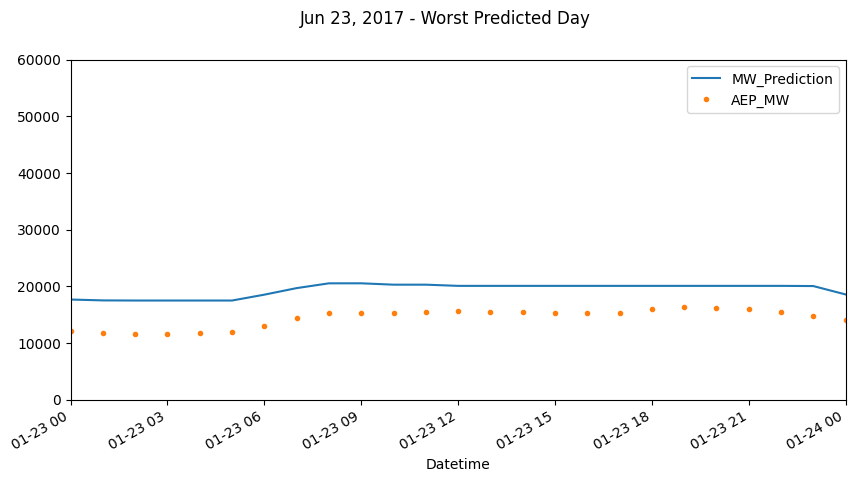

In [26]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
df_all[['MW_Prediction','AEP_MW']].plot(ax=ax,style=['-','.'])
ax.set_ylim(0, 60000)
ax.set_xbound(lower='01-23-2017', upper='01-24-2017')
plot = plt.suptitle('Jun 23, 2017 - Worst Predicted Day')

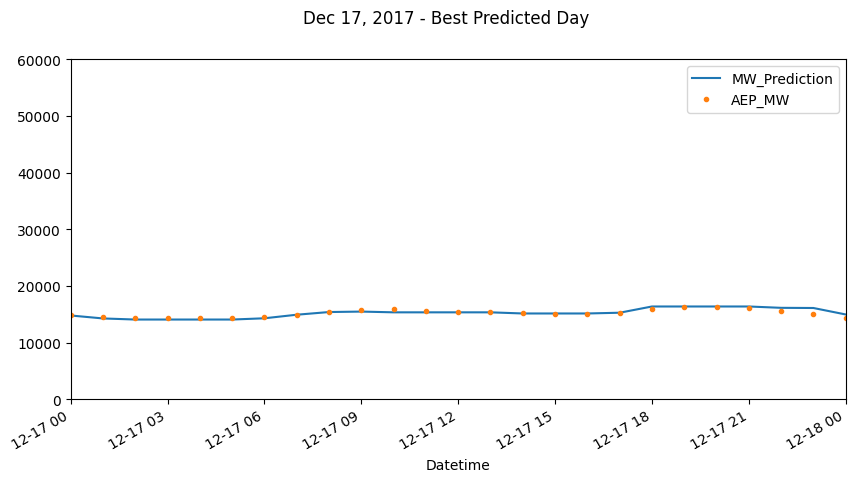

In [27]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(10)
df_all[['MW_Prediction','AEP_MW']].plot(ax=ax,style=['-','.'])
ax.set_ylim(0, 60000)
ax.set_xbound(lower='12-17-2017', upper='12-18-2017')
plot = plt.suptitle('Dec 17, 2017 - Best Predicted Day')

In [28]:
#import pickle
#pickle.dump(reg,open('model.pkl','wb'))
#model=pickle.load(open('model.pkl','rb'))